In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

In [55]:
data_ds = pd.read_csv('./Admission_Predict.csv')
data_ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
data_ds.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [58]:
data_ds.shape

(400, 9)

In [59]:
print(f'no. of rows: {data_ds.shape[0]}, and no. of columns: {data_ds.shape[1]}')

no. of rows: 400, and no. of columns: 9


In [60]:
data_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [61]:
data_ds.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [62]:
data_ds.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [63]:
data_ds.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [64]:
data = data_ds.drop('Serial No.', axis=1)

In [65]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [66]:
data.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [67]:
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

In [68]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [69]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
scaler = StandardScaler()

In [72]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
X_train, X_test

(array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
          0.13986648,  0.92761259],
        [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
          0.36110014, -1.07803625],
        [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
          2.25009529,  0.92761259],
        ...,
        [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
         -0.62594237,  0.92761259],
        [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
         -2.27668588, -1.07803625],
        [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
         -0.57488845, -1.07803625]]),
 array([[-1.4057073 , -0.57209936, -0.057308  ,  0.12715607,  0.61348253,
         -0.79612211,  0.92761259],
        [-0.51865083, -0.90435307, -0.057308  ,  1.10763663,  0.61348253,
          0.08881255,  0.92761259],
        [ 2.05381293,  1.0891692 ,  1.6892215 ,  0.61739635,  0.61348253,
          1.72253809,  0.92761259],
        [ 0.72322823,  0.09240806,  0.81595

In [74]:
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [75]:
svm = SVR()
svm.fit(X=X_train, y=y_train)

SVR()

In [76]:
rf = RandomForestRegressor()
rf.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [77]:
gr = GradientBoostingRegressor()
gr.fit(X=X_train, y=y_train)

GradientBoostingRegressor()

In [78]:
y_pred_lr = lr.predict(X=X_test)
y_pred_svm = svm.predict(X=X_test)
y_pred_rf = rf.predict(X=X_test)
y_pred_gr = gr.predict(X=X_test)

In [80]:
r2_lr = metrics.r2_score(y_true=y_test, y_pred=y_pred_lr)
r2_svm = metrics.r2_score(y_true=y_test, y_pred=y_pred_svm)
r2_rf = metrics.r2_score(y_true=y_test, y_pred=y_pred_rf)
r2_gr = metrics.r2_score(y_true=y_test, y_pred=y_pred_gr)

In [81]:
print(f'R2 for linear Regression: {r2_lr}, R2 for SVM: {r2_svm}, R2 for RandomForest: {r2_rf}, and R2 for GR: {r2_gr}')

R2 for linear Regression: 0.8212082591486991, R2 for SVM: 0.7597814848647667, R2 for RandomForest: 0.8111437912016435, and R2 for GR: 0.7962576713589503


In [82]:
final_r2_score  = pd.DataFrame({
    'Models':['LR', 'SVR', 'RF', 'GR'],
    'R2_SCORE': [r2_lr, r2_svm, r2_rf, r2_gr]
})

In [83]:
final_r2_score

,Models,R2_SCORE
0,LR,0.821208
1,SVR,0.759781
2,RF,0.811144
3,GR,0.796258


In [87]:
# convert the target (y_test, y_train) to 1 or 0

y_train = [1 if value > 0.8 else 0 for value in y_train]
y_test = [1 if value > 0.8 else 0 for value in y_test]

In [88]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [89]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [90]:
y_test

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [95]:
lr = LogisticRegression()
lr.fit(X=X_train, y=y_train)
y_pred_lr = lr.predict(X=X_test)
lr_acc = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_lr)
lr_acc

0.925

In [99]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X=X_train, y=y_train)
y_pred_svm = svm.predict(X=X_test)
svm_acc = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_svm)
svm_acc

0.925

In [101]:
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)
y_pred_knn = knn.predict(X=X_test)
knn_acc = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_knn)
knn_acc

0.8875

In [107]:
grBoost = GradientBoostingClassifier()
grBoost.fit(X=X_train, y=y_train)
y_pred_grBoost = grBoost.predict(X=X_test)
grBoost_acc = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_grBoost)
grBoost_acc

0.975

In [108]:
lr_acc, svm_acc, knn_acc, grBoost_acc

(0.925, 0.925, 0.8875, 0.975)

In [111]:
final_data = pd.DataFrame({
    "Models":['LR','SVC','KNN','GRB'],
    "ACC_SCORE":[lr_acc, svm_acc, knn_acc, grBoost_acc]
})

In [112]:
final_data

,Models,ACC_SCORE
0,LR,0.9250
1,SVC,0.9250
2,KNN,0.8875
3,GRB,0.9750


<Axes: xlabel='Models', ylabel='ACC_SCORE'>

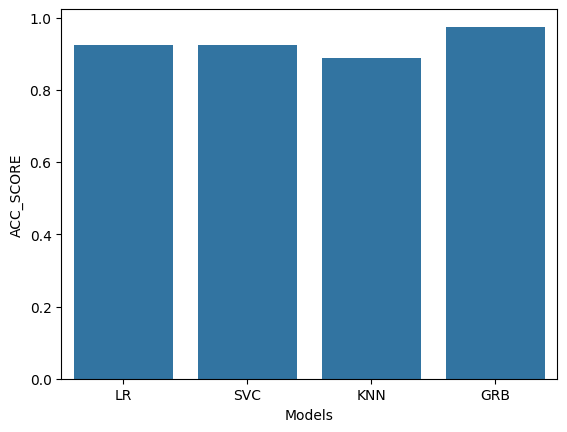

In [114]:
sns.barplot(x=final_data['Models'], y=final_data['ACC_SCORE'])